### Importing Libraries
### <font color=purple>1.1 For reading and manipulating data</font>

In [ ]:
import pandas as pd
import numpy as np

### <font color=purple>1.2 For plotting</font>

In [ ]:
import matplotlib.pyplot as plt

### <font color=purple>1.3 For modelling</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

### <font color=purple>1.4 For performance measures</font>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

### <font color=purple>1.5 For splitting the data</font>

In [ ]:
from sklearn.model_selection import train_test_split

### <font color=purple>1.6 For data preprocessing</font>

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA

### Read, analyse and preprocess dataset. Then split it into train and test datasets.
### <font color=purple>2.1 Read dataset</font>

In [ ]:
data = pd.read_csv("../input/data.csv")
data.info()

### <font color=purple>2.2 Drop any column not needed</font>

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)

### <font color=purple>2.3 Segregate dataset into predictors (X) and target (y)</font>

In [ ]:
y = data.diagnosis
y.unique()

X = data.drop(['diagnosis'], axis=1)

### <font color=purple>2.4 Map values in ' y ' (target) from 'M' and 'B' to 1 and 0</font>

In [ ]:
y = y.map(lambda x: 1 if x=='M' else 0)
y.tail(10)

### <font color=purple>2.5 Scale all numerical features in X  using sklearn's StandardScaler class</font>

In [ ]:
scaler = ss()
scaled = scaler.fit_transform(X)


### <font color=purple>2.6 Performing PCA on numeric features, X. Using sklearn's PCA class. Only retaining as many principal components (PCs) as explain 95% variance. </font>

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(scaled)

pca.explained_variance_ratio_.cumsum()

In [ ]:
X = scaled[:, 0:10]

### <font color=purple>2.7 Spliting X, y into train and test datasets in the ratio of 80:20 using sklearn's train_test_split function. We get: x_train, x_test, y_train, y_test.</font>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True)


### Perform modeling on (x_train, y_train) using -
#### RandomForestClassifier,<br>GradientBoostingClassifier,<br>XGBClassifier,<br>DecisionTreeClassifier,<br>ExtraTreesClassifier,<br>KNeighborsClassifier												
### <font color=purple>3.1 Create default classifiers</font>

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
xg = XGBClassifier()
gbm = GradientBoostingClassifier()
etc = ExtraTreesClassifier(n_estimators=100)
knc = KNeighborsClassifier()

### <font color=purple>3.2 Train the models.</font>

In [ ]:
dt1 = dt.fit(x_train,y_train)
rf1 = rf.fit(x_train,y_train)
xg1 = xg.fit(x_train,y_train)
gbm1 = gbm.fit(x_train,y_train)
etc1 = etc.fit(x_train,y_train)
knc1 = knc.fit(x_train,y_train)

### <font color=purple>4.1 Make predictions on test (x_test) for each one of the models. Compare the output of predictions in each case with actual (y_test)</font>

In [ ]:
y_pred_dt = dt1.predict(x_test)
y_pred_rf = rf1.predict(x_test)
y_pred_xg= xg1.predict(x_test)
y_pred_gbm= gbm1.predict(x_test)
y_pred_etc= etc1.predict(x_test)
y_pred_knc= knc1.predict(x_test)

### <font color=purple>4.2 Get probability values</font>

In [ ]:
y_pred_dt_prob = dt1.predict_proba(x_test)
y_pred_rf_prob = rf1.predict_proba(x_test)
y_pred_xg_prob = xg1.predict_proba(x_test)
y_pred_gbm_prob= gbm1.predict_proba(x_test)
y_pred_etc_prob = etc1.predict_proba(x_test)
y_pred_knc_prob= knc1.predict_proba(x_test)


### <font color=purple>5.1 Draw Confusion matrix</font>


In [ ]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_xg = confusion_matrix(y_test,y_pred_xg)
cm_gbm = confusion_matrix(y_test,y_pred_gbm)
cm_etc = confusion_matrix(y_test,y_pred_etc)
cm_knc = confusion_matrix(y_test,y_pred_knc)

cms = [cm_dt, cm_rf, cm_xg, cm_gbm, cm_etc, cm_knc]
classifiers = ["Decision Tree","Random Forest","XGBoost","GBM","Exrta Trees","KNeighbors"]

def plot_confusion_matrix(cms):
   
    fig = plt.figure(figsize=(16,12))
    plt.subplots_adjust( hspace=0.5, wspace=0.1)
    for i in range(6):
        j = i+1
        ax = fig.add_subplot(2,3,j)
        plt.imshow(cms[i], interpolation='nearest', cmap=plt.cm.Purples)

        classNames = ['B','M']

        plt.ylabel('Actual', size='large')

        plt.xlabel('Predicted', size='large')

        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, size='x-large')

        plt.yticks(tick_marks, classNames, size='x-large')

        s = [['TN','FP'], ['FN', 'TP']]
    
    
        plt.text(-0.23,0.05, str(s[0][0])+" = "+str(cms[i][0][0]), size='x-large')
        plt.text(0.8,0.05, str(s[0][1])+" = "+str(cms[i][0][1]), size='x-large')
        plt.text(-0.23,1.05, str(s[1][0])+" = "+str(cms[i][1][0]), size='x-large')
        plt.text(0.8,1.05, str(s[1][1])+" = "+str(cms[i][1][1]), size='x-large')
        plt.title(classifiers[i], fontsize=15)

plot_confusion_matrix(cms)


### Calculate the performance of each of these models by calculating:
#### a) Accuracy,<br>b) Precision & Recall,<br>c) F1 score,<br>d) AUC
### <font color=purple>6.1 Calculate accuracy</font>

In [ ]:
print(accuracy_score(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_xg))
print(accuracy_score(y_test,y_pred_gbm))
print(accuracy_score(y_test,y_pred_etc))
print(accuracy_score(y_test,y_pred_knc))

### <font color=purple>6.2 Calculate precision, recall and F1 score</font>

In [ ]:
print(accuracy_score(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_xg))
print(accuracy_score(y_test,y_pred_gbm))
print(accuracy_score(y_test,y_pred_etc))
print(accuracy_score(y_test,y_pred_knc))

In [ ]:
precision_recall_fscore_support(y_test, y_pred_dt)
precision_recall_fscore_support(y_test, y_pred_rf)
precision_recall_fscore_support(y_test, y_pred_xg)
precision_recall_fscore_support(y_test, y_pred_gbm)
precision_recall_fscore_support(y_test, y_pred_etc)
precision_recall_fscore_support(y_test, y_pred_knc)

### <font color=purple>7.0 ROC data.</font>

In [ ]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 y_pred_dt_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_xg, tpr_xg, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test,
                                 y_pred_gbm_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_etc, tpr_etc,thresholds = roc_curve(y_test,
                                 y_pred_etc_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_knc, tpr_knc,thresholds = roc_curve(y_test,
                                 y_pred_knc_prob[: , 1],
                                 pos_label= 1
                                 )

### <font color=purple>6.3 Get AUC values.</font>

In [ ]:
print("Decision Tree: ",auc(fpr_dt,tpr_dt))
print("Random Forest: ",auc(fpr_rf,tpr_rf))
print("GBM: ",auc(fpr_gbm,tpr_gbm))
print("XGBoost: ",auc(fpr_xg,tpr_xg))
print("Extra Trees : ",auc(fpr_etc,tpr_etc))
print("KNeighbors: ",auc(fpr_knc,tpr_knc))


### <font color='purple'>8.1 Plot ROC curve</font>

In [ ]:
fig = plt.figure(figsize=(12,10))   # Create window frame
ax = fig.add_subplot(111)   # Create axes

#8.1 Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")  # Dashed diagonal line

#8.2 Labels 
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

#8.3 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

#8.4 Plot each graph now
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")
ax.plot(fpr_etc, tpr_etc, label = "etc")
ax.plot(fpr_knc, tpr_knc, label = "knc")

#8.5 Set legend and show plot
ax.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

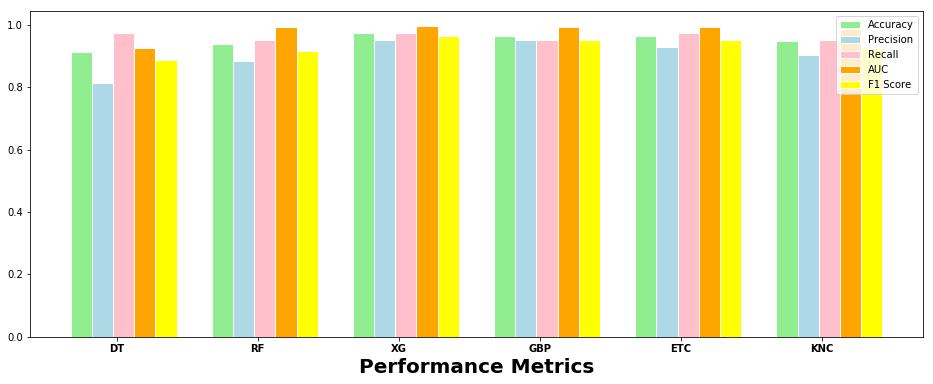

In [79]:
performance = pd.DataFrame({ "classifiers":["dt","rf",'xg','gbm','etc','knc'],
"Accuracy": [accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_xg),accuracy_score(y_test,y_pred_gbm),accuracy_score(y_test,y_pred_etc),accuracy_score(y_test,y_pred_knc)],
"Precision": [precision_score(y_test,y_pred_dt),precision_score(y_test,y_pred_rf),precision_score(y_test,y_pred_xg),precision_score(y_test,y_pred_gbm),precision_score(y_test,y_pred_etc),precision_score(y_test,y_pred_knc)],
"AUC":[auc(fpr_dt,tpr_dt),auc(fpr_rf,tpr_rf),auc(fpr_xg,tpr_xg),auc(fpr_gbm,tpr_gbm),auc(fpr_etc,tpr_etc),auc(fpr_knc,tpr_knc)],
"Recall":[recall_score(y_test,y_pred_dt),recall_score(y_test,y_pred_rf),recall_score(y_test,y_pred_xg),recall_score(y_test,y_pred_gbm),recall_score(y_test,y_pred_etc),recall_score(y_test,y_pred_knc)],
"f1_score":[f1_score(y_test,y_pred_dt),f1_score(y_test,y_pred_rf),f1_score(y_test,y_pred_xg),f1_score(y_test,y_pred_gbm),f1_score(y_test,y_pred_etc),f1_score(y_test,y_pred_knc)]})


plt.clf()

vals= np.array(performance.iloc[0, 1:].values.tolist())
for i in range(1,6):
    vals = np.append(vals,performance.iloc[i, 1:].values.tolist())


barWidth = 0.15
plt.figure(figsize=(16,6))
# set height of bar
bars1 = performance.Accuracy
bars2 = performance.Precision
bars3 = performance.Recall
bars4 = performance.AUC
bars5 = performance.f1_score
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='lightgreen', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, bars3, color='pink', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='AUC')
plt.bar(r5, bars5, color='yellow', width=barWidth, edgecolor='white', label='F1 Score')
 
# Add xticks on the middle of the group bars
plt.xlabel('Performance Metrics', fontweight='bold', fontsize=20)
plt.xticks([r + barWidth +0.1 for r in range(len(bars1))], ['DT', 'RF', 'XG', 'GBP', 'ETC', 'KNC'],fontweight='bold', fontsize=10)

# Create legend & Show graphic
plt.legend()
plt.show()

